In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

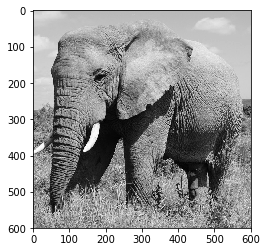

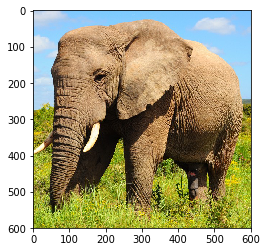

In [2]:
imageGray = cv2.imread("../pics/elephant.jpg", cv2.IMREAD_GRAYSCALE)
plt.imshow(imageGray, "gray")
plt.show()

imageColor = cv2.imread("../pics/elephant.jpg", cv2.IMREAD_COLOR)

b,g,r = cv2.split(imageColor)
imageColor = cv2.merge((r,g,b))

plt.imshow(imageColor)
plt.show()

In [3]:
def avgIntensity(image):
    
    w = image.shape[0]
    h = image.shape[1]
    
    
    if len(image.shape) == 3: # it is colored
        b,g,r = cv2.split(image)
        ciAvg = np.array([np.sum(b),np.sum(g),np.sum(r)]) / (w*h) # color intesity average
        print( "average intensities: ", ciAvg)
        return ciAvg
    else:
        iAvg = int( np.sum(image) / (w*h) )
        print( "average intensity: ", iAvg)
        return iAvg
    
    return -1 # if haven't returned yet there is a problem

In [4]:
avgIntensity(imageGray)
avgIntensity(imageColor)

average intensity:  136
average intensities:  [146.91553056 138.9874      96.61426111]


array([146.91553056, 138.9874    ,  96.61426111])

In [70]:
def thresholdImg(image, threshold):
    if len(image.shape) == 3: # it is colored
        colors = cv2.split(image)
        if len(threshold) == 3:
            for i in range(3):
                colors[i] = colors[i] * (colors[i] > threshold[i])
        else:
            for i in range(3):
                colors[i] = colors[i] * (colors[i] > threshold)
        return cv2.merge(colors)
    else:
        return image * ( image > threshold )
    
    return -1  # if haven't returned yet there is a problem

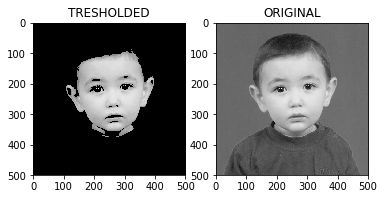

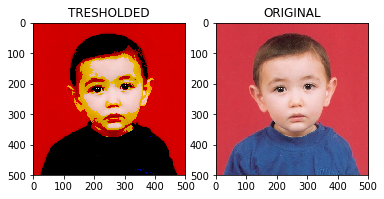

In [72]:
threshold = 130
t_image = thresholdImg(imageGray, threshold)

plt.close('all')
plt.subplot(121),plt.imshow(t_image,'gray'),plt.title('TRESHOLDED')
plt.subplot(122),plt.imshow(imageGray,'gray'),plt.title('ORIGINAL')
plt.show()

threshold = [130, 150, 170]
t_image = thresholdImg(imageColor, threshold)
plt.close('all')
plt.subplot(121),plt.imshow(t_image),plt.title('TRESHOLDED')
plt.subplot(122),plt.imshow(imageColor),plt.title('ORIGINAL')
plt.show()

In [74]:
def tresholdWithAvg(image):
    avgI = avgIntensity(image)
    return thresholdImg(image, avgI)

average intensity:  115


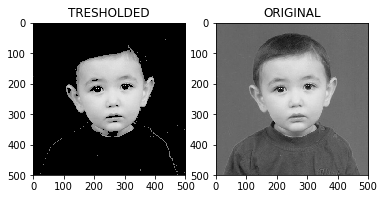

averages:  [171  88 103]


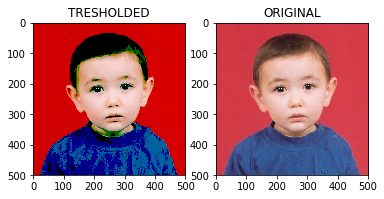

In [75]:
t_image = tresholdWithAvg(imageGray)
plt.close('all')
plt.subplot(121),plt.imshow(t_image,'gray'),plt.title('TRESHOLDED')
plt.subplot(122),plt.imshow(imageGray,'gray'),plt.title('ORIGINAL')
plt.show()

t_image = tresholdWithAvg(imageColor)
plt.close('all')
plt.subplot(121),plt.imshow(t_image),plt.title('TRESHOLDED')
plt.subplot(122),plt.imshow(imageColor),plt.title('ORIGINAL')
plt.show()